In [1]:
# Import Library

# Library for data exploration & cleaning
import pandas as pd 

# Library for data calculation
import numpy as np 

# Library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library for correlation
import statsmodels.api as sm
from scipy import stats
from scipy.stats import kendalltau
from scipy.stats import linregress

# Library for data preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Library for splitting data
from sklearn.model_selection import train_test_split

# Library for model training
from sklearn.linear_model import LinearRegression

# Library for model evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error

# Library for model saving
import pickle

#Untuk mengabaikan fitur peringatan
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_raw = pd.read_csv('data_cluster.csv')

In [3]:
data_raw.head()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,discount,...,shipping_cost,order_priority,customer_id,customer_name,city,state,country,region,months,cluster
0,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140,2,5,...,4,Medium,LS-001,Lane Daniels,Brisbane,Queensland,Australia,Oceania,Nov,bronze
1,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211,3,3,...,11,Medium,IZ-002,Alvarado Kriz,Berlin,Berlin,Germany,Central,Jun,bronze
2,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117,5,1,...,3,Critical,EN-003,Moon Weien,Porirua,Wellington,New Zealand,Oceania,Dec,bronze
3,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118,2,5,...,2,High,AN-004,Sanchez Bergman,Kabul,Kabul,Afghanistan,Central Asia,May,bronze
4,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250,1,4,...,16,Critical,ON-005,Rowe Jackson,Townsville,Queensland,Australia,Oceania,Jul,bronze


In [4]:
data_raw.tail()

,order_id,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,discount,...,shipping_cost,order_priority,customer_id,customer_name,city,state,country,region,months,cluster
51272,FA-2015-30771,2015-01-21,2015-01-27,6,Standard Class,Fashion,Sports Wear,85,5,4,...,1,Medium,IN-0040977,Welch Fein,Pasadena,Texas,United States,Central,Jan,silver
51273,FA-2015-30772,2015-06-22,2015-06-24,2,Standard Class,Fashion,Sports Wear,85,1,3,...,0,Medium,TT-0040978,Martinez Arnett,Harare,Harare,Zimbabwe,Africa,Jun,silver
51274,FA-2015-30773,2015-01-01,2015-01-07,6,Standard Class,Fashion,Sports Wear,85,1,5,...,0,Medium,ON-0040979,Mccoy Duston,Townsville,Queensland,Australia,Oceania,Jan,silver
51275,FA-2015-30774,2015-12-07,2015-12-14,7,Standard Class,Fashion,Sports Wear,85,3,4,...,2,Medium,RN-0040980,Bentley Zypern,Houston,Texas,United States,Central,Dec,silver
51276,FA-2015-30775,2015-12-01,2015-12-06,5,Standard Class,Fashion,Sports Wear,85,3,3,...,2,Medium,RZ-0040981,Mcclure Schwarz,Valinhos,São Paulo,Brazil,South,Dec,silver


In [5]:
data_raw_copy = data_raw.copy()

In [6]:
data_raw.shape

(51277, 21)

In [7]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51277 entries, 0 to 51276
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_id          51277 non-null  object
 1   order_date        51277 non-null  object
 2   ship_date         51277 non-null  object
 3   aging             51277 non-null  int64 
 4   ship_mode         51277 non-null  object
 5   product_category  51277 non-null  object
 6   product           51277 non-null  object
 7   sales             51277 non-null  int64 
 8   quantity          51277 non-null  int64 
 9   discount          51277 non-null  int64 
 10  profit            51277 non-null  int64 
 11  shipping_cost     51277 non-null  int64 
 12  order_priority    51277 non-null  object
 13  customer_id       51277 non-null  object
 14  customer_name     51277 non-null  object
 15  city              51277 non-null  object
 16  state             51277 non-null  object
 17  country     

In [8]:
data_raw.columns

Index(['order_id', 'order_date', 'ship_date', 'aging', 'ship_mode',
       'product_category', 'product', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority', 'customer_id',
       'customer_name', 'city', 'state', 'country', 'region', 'months',
       'cluster'],
      dtype='object')

In [9]:
# # Selects numeric columns
numeric = data_raw.select_dtypes(include=['int64', 'float64']).columns

# Selects categorical columns
category = data_raw.select_dtypes(include=['object']).columns


In [10]:
# Define variable
num = numeric.shape[0]

# Showing number of columns with numeric data type
print(f"Jumlah kolom yang bertipe data numerikal adalah :", num, "kolom", "\n","\n", numeric)

Jumlah kolom yang bertipe data numerikal adalah : 6 kolom 
 
 Index(['aging', 'sales', 'quantity', 'discount', 'profit', 'shipping_cost'], dtype='object')


In [11]:
# Define variable
cat = category.shape[0]

# Showing number of columns with numeric data type
print(f"Jumlah kolom yang bertipe data kategorikal adalah :",cat, "kolom", "\n","\n",category)

Jumlah kolom yang bertipe data kategorikal adalah : 15 kolom 
 
 Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'product_category',
       'product', 'order_priority', 'customer_id', 'customer_name', 'city',
       'state', 'country', 'region', 'months', 'cluster'],
      dtype='object')


In [12]:
# Check duplicate rows
data_raw.duplicated().sum()

0

In [13]:
# Check missing value
data_raw.isnull().sum()

order_id            0
order_date          0
ship_date           0
aging               0
ship_mode           0
product_category    0
product             0
sales               0
quantity            0
discount            0
profit              0
shipping_cost       0
order_priority      0
customer_id         0
customer_name       0
city                0
state               0
country             0
region              0
months              0
cluster             0
dtype: int64

In [14]:
# Showing descriptive statistics for numeric columns
data_raw[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
aging,51277.0,5.255241,2.960071,1.0,3.0,5.0,8.0,10.0
sales,51277.0,156.428321,65.779655,33.0,109.0,159.0,218.0,250.0
quantity,51277.0,2.997270,1.413383,1.0,2.0,3.0,4.0,5.0
discount,51277.0,2.997192,1.411422,1.0,2.0,3.0,4.0,5.0
profit,51277.0,72.322289,49.097407,0.0,25.0,67.0,120.0,167.0
shipping_cost,51277.0,6.831035,4.915044,0.0,2.0,6.0,12.0,16.0


In [15]:
# Returns the number of unique values ​​in each column of data_raw
data_raw.nunique()

order_id            51277
order_date            365
ship_date             375
aging                  10
ship_mode               4
product_category        4
product                42
sales                  39
quantity                5
discount                5
profit                154
shipping_cost          17
order_priority          4
customer_id         51277
customer_name         795
city                 3636
state                1094
country               147
region                 15
months                 12
cluster                 3
dtype: int64

## C. Data Cleaning


In [16]:
data_raw = data_raw.drop(columns=['order_id', 'customer_id'])

In [17]:
data_raw

,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,customer_name,city,state,country,region,months,cluster
0,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140,2,5,46,4,Medium,Lane Daniels,Brisbane,Queensland,Australia,Oceania,Nov,bronze
1,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211,3,3,112,11,Medium,Alvarado Kriz,Berlin,Berlin,Germany,Central,Jun,bronze
2,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117,5,1,31,3,Critical,Moon Weien,Porirua,Wellington,New Zealand,Oceania,Dec,bronze
3,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118,2,5,26,2,High,Sanchez Bergman,Kabul,Kabul,Afghanistan,Central Asia,May,bronze
4,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250,1,4,160,16,Critical,Rowe Jackson,Townsville,Queensland,Australia,Oceania,Jul,bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51272,2015-01-21,2015-01-27,6,Standard Class,Fashion,Sports Wear,85,5,4,17,1,Medium,Welch Fein,Pasadena,Texas,United States,Central,Jan,silver
51273,2015-06-22,2015-06-24,2,Standard Class,Fashion,Sports Wear,85,1,3,2,0,Medium,Martinez Arnett,Harare,Harare,Zimbabwe,Africa,Jun,silver
51274,2015-01-01,2015-01-07,6,Standard Class,Fashion,Sports Wear,85,1,5,0,0,Medium,Mccoy Duston,Townsville,Queensland,Australia,Oceania,Jan,silver
51275,2015-12-07,2015-12-14,7,Standard Class,Fashion,Sports Wear,85,3,4,28,2,Medium,Bentley Zypern,Houston,Texas,United States,Central,Dec,silver


In [18]:
data_raw['region'].value_counts()

region
Central           11115
South              6642
EMEA               5029
North              4782
Africa             4586
Oceania            3486
West               3202
Southeast Asia     3128
East               2848
North Asia         2335
Central Asia       2048
Caribbean          1690
Canada              384
So3th                 1
4orth                 1
Name: count, dtype: int64

In [19]:
# Menghapus baris dengan nilai 'So3th' dan '4orth' pada kolom 'region'
data_raw = data_raw.drop(data_raw[(data_raw['region'] == 'So3th') | (data_raw['region'] == '4orth')].index)

# Reset ulang indeks jika diperlukan
data_raw.reset_index(drop=True, inplace=True)


In [20]:
data_raw['region'].value_counts()

region
Central           11115
South              6642
EMEA               5029
North              4782
Africa             4586
Oceania            3486
West               3202
Southeast Asia     3128
East               2848
North Asia         2335
Central Asia       2048
Caribbean          1690
Canada              384
Name: count, dtype: int64

In [21]:
data_raw.dtypes

order_date          object
ship_date           object
aging                int64
ship_mode           object
product_category    object
product             object
sales                int64
quantity             int64
discount             int64
profit               int64
shipping_cost        int64
order_priority      object
customer_name       object
city                object
state               object
country             object
region              object
months              object
cluster             object
dtype: object

In [22]:
# Change datatype
data_raw['order_date'] = pd.to_datetime(data_raw['order_date'])
# Change datatype
data_raw['ship_date'] = pd.to_datetime(data_raw['ship_date'])

In [23]:
data_raw.dtypes

order_date          datetime64[ns]
ship_date           datetime64[ns]
aging                        int64
ship_mode                   object
product_category            object
product                     object
sales                        int64
quantity                     int64
discount                     int64
profit                       int64
shipping_cost                int64
order_priority              object
customer_name               object
city                        object
state                       object
country                     object
region                      object
months                      object
cluster                     object
dtype: object

In [24]:
data_clean = data_raw
data_clean.head()

,order_date,ship_date,aging,ship_mode,product_category,product,sales,quantity,discount,profit,shipping_cost,order_priority,customer_name,city,state,country,region,months,cluster
0,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,140,2,5,46,4,Medium,Lane Daniels,Brisbane,Queensland,Australia,Oceania,Nov,bronze
1,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,211,3,3,112,11,Medium,Alvarado Kriz,Berlin,Berlin,Germany,Central,Jun,bronze
2,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,117,5,1,31,3,Critical,Moon Weien,Porirua,Wellington,New Zealand,Oceania,Dec,bronze
3,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,118,2,5,26,2,High,Sanchez Bergman,Kabul,Kabul,Afghanistan,Central Asia,May,bronze
4,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,250,1,4,160,16,Critical,Rowe Jackson,Townsville,Queensland,Australia,Oceania,Jul,bronze


# **v. Feature Engineering / Data Preprocessing**

## A. Cardinality

In [25]:
# Define variable to Get a list of category column names with data type object from data_clean
cat_cardinal = data_clean.select_dtypes(include=['object']).columns.tolist()

In [26]:
# Looping to calculate and print the cardinality of each category column
for cardinal in cat_cardinal:
  print(f'Jumlah cardinality dari kolom {cardinal} adalah:', data_clean[cardinal].nunique())

Jumlah cardinality dari kolom ship_mode adalah: 4
Jumlah cardinality dari kolom product_category adalah: 4
Jumlah cardinality dari kolom product adalah: 42
Jumlah cardinality dari kolom order_priority adalah: 4
Jumlah cardinality dari kolom customer_name adalah: 795
Jumlah cardinality dari kolom city adalah: 3636
Jumlah cardinality dari kolom state adalah: 1094
Jumlah cardinality dari kolom country adalah: 147
Jumlah cardinality dari kolom region adalah: 13
Jumlah cardinality dari kolom months adalah: 12
Jumlah cardinality dari kolom cluster adalah: 3


In [27]:
# Daftar kolom kategorikal yang memiliki cardinalitas lebih dari 100
cardinal_more_than_100 = ['customer_name', 'city', 'state', 'country']

# Menghapus kolom-kolom tersebut dari DataFrame
data_clean = data_clean.drop(columns=cardinal_more_than_100)


In [28]:
data_clean.columns

Index(['order_date', 'ship_date', 'aging', 'ship_mode', 'product_category',
       'product', 'sales', 'quantity', 'discount', 'profit', 'shipping_cost',
       'order_priority', 'region', 'months', 'cluster'],
      dtype='object')

In [29]:
numeric

Index(['aging', 'sales', 'quantity', 'discount', 'profit', 'shipping_cost'], dtype='object')

## B. Heatmap Correlation for numerical column

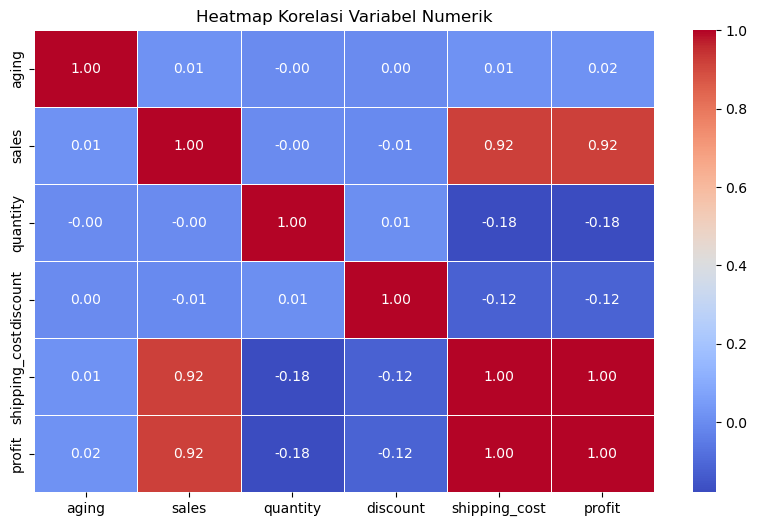

In [30]:
# Memilih subset kolom numerik
numeric_columns = ['aging', 'sales', 'quantity', 'discount', 'shipping_cost', 'profit']

# Mengambil subset DataFrame
numeric_data = data_clean[numeric_columns]

# Menghitung matriks korelasi
correlation_matrix = numeric_data.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()


## C. Kendalltau Correlation for categorical column

In [31]:
# Select columns of type object (category)
categorical_columns = data_clean.select_dtypes(include=['object']).columns

# Loop through each category column and calculate the Kendalltau correlation with 'profit'
for col in categorical_columns:
    correlation, p_value = kendalltau(data_clean[col], data_clean['profit'])
    print(f"Korelasi Kendalltau antara {col} dan profit:", correlation)
    print(f"Nilai p-value antara {col} dan profit:", p_value)
    print('\n')

Korelasi Kendalltau antara ship_mode dan profit: 0.1250718303471218
Nilai p-value antara ship_mode dan profit: 2.5110548636735344e-291


Korelasi Kendalltau antara product_category dan profit: -0.036730935346940885
Nilai p-value antara product_category dan profit: 8.87350886019527e-27


Korelasi Kendalltau antara product dan profit: 0.12663481217980058
Nilai p-value antara product dan profit: 0.0




Korelasi Kendalltau antara order_priority dan profit: 0.05166719356382439
Nilai p-value antara order_priority dan profit: 2.6103791983592597e-50


Korelasi Kendalltau antara region dan profit: 0.0037707688376600024
Nilai p-value antara region dan profit: 0.22558616745170146


Korelasi Kendalltau antara months dan profit: -0.002142167491764928
Nilai p-value antara months dan profit: 0.4867202082672707


Korelasi Kendalltau antara cluster dan profit: -0.36158418113307955
Nilai p-value antara cluster dan profit: 0.0




## D. Feature Selection

### 1. Categorical Column Selection


In [32]:
# List to store column names with significant correlations
korelasi_cat = []
selected_cat = []

# Define variable to save what columns are included in the correlation calculation
corr_cat= data_clean.select_dtypes(include=['object']).columns

In [33]:
# Looping to calculate feature correlation with target
for i in corr_cat:
    correlation, p_value = kendalltau(data_clean['profit'], data_clean[i])

# Set threshold to 0.05 to remove columns that don't fulfil the threshold
    if p_value < 0.05:
        korelasi_cat.append(i)
        selected_cat.append(i)

# Create a dataframe containing a p-value column >= 0.05
selected_feat_cat = data_clean[selected_cat]

# Show dataframe
selected_feat_cat

,ship_mode,product_category,product,order_priority,cluster
0,First Class,Auto & Accessories,Car Media Players,Medium,bronze
1,First Class,Auto & Accessories,Car Speakers,Medium,bronze
2,First Class,Auto & Accessories,Car Body Covers,Critical,bronze
3,First Class,Auto & Accessories,Car & Bike Care,High,bronze
4,First Class,Auto & Accessories,Tyre,Critical,bronze
...,...,...,...,...,...
51270,Standard Class,Fashion,Sports Wear,Medium,silver
51271,Standard Class,Fashion,Sports Wear,Medium,silver
51272,Standard Class,Fashion,Sports Wear,Medium,silver
51273,Standard Class,Fashion,Sports Wear,Medium,silver


### 2. Numerical Column Selection


In [34]:
# Calculates the correlation matrix between numeric features in data_clean
correlation_matrix = numeric_data.corr()

# Take the correlation series between 'profit' and other numeric features
correlation_with_profit = correlation_matrix['profit']

# Select features with either positive correlation (> 0.1) or negative correlation (< -0.1) to 'profit'
selected_corr = correlation_with_profit[(correlation_with_profit > 0.1) | (correlation_with_profit < -0.1)].index.tolist()

# Create a new DataFrame containing only selected features
selected_feat_num = data_clean[selected_corr]

# Show DataFrame
selected_feat_num


,sales,quantity,discount,shipping_cost,profit
0,140,2,5,4,46
1,211,3,3,11,112
2,117,5,1,3,31
3,118,2,5,2,26
4,250,1,4,16,160
...,...,...,...,...,...
51270,85,5,4,1,17
51271,85,1,3,0,2
51272,85,1,5,0,0
51273,85,3,4,2,28


In [61]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Pilih kolom-kolom yang ingin diuji VIF-nya (variabel independen)
# Misalnya, kita akan menguji VIF untuk kolom 'aging', 'sales', 'quantity', 'discount', dan 'shipping_cost'

# Buat DataFrame baru hanya dengan kolom-kolom yang dipilih
X = selected_feat_num

# Tambahkan kolom konstanta untuk menghitung intercept
X['intercept'] = 1

# Menghitung VIF untuk setiap variabel
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Filter hanya variabel dengan VIF <= 5
vif_filtered = vif[vif['VIF'] <= 5]

# Tampilkan hasil VIF yang telah difilter
vif_filtered


,Variable,VIF
1,quantity,1.28394
2,discount,1.11356


In [60]:
# Menggabungkan dataframe selected_feat_cat dan kolom quantity serta discount dari selected_feat_num
df_feature = pd.concat([selected_feat_cat, selected_feat_num[['quantity', 'discount']]], axis=1)

# Menambahkan kolom 'profit' ke dalam df_feature
df_feature['profit'] = data_clean['profit']

# Reset index dari dataframe df_feature dan hapus kolom index lama
df_feature.reset_index(drop=True, inplace=True)

# Tampilkan dataframe df_feature
df_feature


,ship_mode,product_category,product,order_priority,cluster,quantity,discount,profit
0,First Class,Auto & Accessories,Car Media Players,Medium,bronze,2,5,46
1,First Class,Auto & Accessories,Car Speakers,Medium,bronze,3,3,112
2,First Class,Auto & Accessories,Car Body Covers,Critical,bronze,5,1,31
3,First Class,Auto & Accessories,Car & Bike Care,High,bronze,2,5,26
4,First Class,Auto & Accessories,Tyre,Critical,bronze,1,4,160
...,...,...,...,...,...,...,...,...
51270,Standard Class,Fashion,Sports Wear,Medium,silver,5,4,17
51271,Standard Class,Fashion,Sports Wear,Medium,silver,1,3,2
51272,Standard Class,Fashion,Sports Wear,Medium,silver,1,5,0
51273,Standard Class,Fashion,Sports Wear,Medium,silver,3,4,28


## F. Split Data

In [62]:
# Separate features and target
X = df_feature.drop('profit', axis=1)
y = df_feature['profit']

In [63]:
# Separate data into data training and data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=49)

# Show result
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35892, 7)
(15383, 7)
(35892,)
(15383,)


In [64]:
# Select numerical columns from X_train
X_train_num = X_train[['quantity', 'discount']]

# Select numerical columns from X_test
X_test_num = X_test[['quantity', 'discount']]

In [65]:
# Show dataframe of X_train_num
X_train_num

,quantity,discount
34859,1,2
6081,1,1
24561,3,1
47357,4,2
28018,4,4
...,...,...
7924,4,4
19638,3,5
15861,1,4
29096,2,4


In [66]:
# Show dataframe of X_test_num
X_test_num

,quantity,discount
10846,2,3
21494,2,2
8069,1,4
5080,3,3
50215,4,1
...,...,...
562,4,4
13283,5,5
42184,1,4
28315,3,2


In [67]:
# Select categorical columns from X_train
X_train_cat = X_train.select_dtypes(include=['object'])

# Select numerical columns from X_test
X_test_cat = X_test.select_dtypes(include=['object'])

In [68]:
# Show dataframe of X_train_cat
X_train_cat

,ship_mode,product_category,product,order_priority,cluster
34859,Standard Class,Fashion,Sports Wear,Medium,silver
6081,First Class,Auto & Accessories,Car Body Covers,High,bronze
24561,Standard Class,Fashion,Jeans,Medium,gold
47357,Standard Class,Fashion,Sneakers,Medium,silver
28018,Standard Class,Fashion,Casula Shoes,High,silver
...,...,...,...,...,...
7924,Same Day,Electronic,Fans,Medium,bronze
19638,Second Class,Home & Furniture,Umbrellas,Medium,silver
15861,Second Class,Home & Furniture,Bed Sheets,Medium,gold
29096,Standard Class,Fashion,Casula Shoes,Medium,silver


In [71]:
# Show dataframe of X_test_cat
X_test_cat

,ship_mode,product_category,product,order_priority,cluster
10846,Second Class,Home & Furniture,Beds,High,silver
21494,Standard Class,Fashion,Sports Wear,Medium,silver
8069,Same Day,Electronic,Iron,Critical,bronze
5080,First Class,Auto & Accessories,Car Media Players,High,bronze
50215,Standard Class,Fashion,Running Shoes,Medium,gold
...,...,...,...,...,...
562,First Class,Auto & Accessories,Tyre,Critical,bronze
13283,Second Class,Home & Furniture,Curtains,Medium,silver
42184,Standard Class,Fashion,Suits,Low,silver
28315,Standard Class,Fashion,Casula Shoes,Medium,silver
